In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
my_data=pd.read_csv("airbnb prices.csv")

In [3]:
my_data.dtypes
my_data.columns

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city',
       'borough', 'neighborhood', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'name',
       'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')


<br>
==============================================================================<br>
checking Room id for any nans or wrong entries<br>
==============================================================================<br>


In [4]:
my_data['room_id'].hasnans
rid_unique=np.unique(my_data["room_id"])
pd.value_counts(my_data.duplicated(subset=['room_id']))

False    18723
dtype: int64


 <br>
==============================================================================<br>
no missing or wrong entries found<br>
Survey id is the survey number airbnb has done so it is same for every record<br>
and is insignificant in this case so it is being dropped.<br>
==============================================================================<br>


In [5]:
my_data.drop(columns=['survey_id'],inplace=True)


 <br>
==============================================================================<br>
Checking host id for any nans or wrong entries<br>
==============================================================================<br>


In [6]:
my_data['host_id'].hasnans
hid_unique=np.unique(my_data["host_id"])
pd.value_counts(my_data.duplicated(subset=['host_id']))
pd.value_counts(my_data["host_id"])

48703385     93
113977564    88
1464510      71
107745142    64
84453740     61
             ..
37868735      1
5405902       1
5414086       1
8645832       1
1771519       1
Name: host_id, Length: 15943, dtype: int64


<br>
==============================================================================<br>
2780 hosts have multiple listings<br>
host id : 48703385 has maximum number of listing 93<br>
==============================================================================<br>



<br>
==============================================================================<br>
Checking room type for any nans or wrong entries<br>
==============================================================================<br>


In [7]:
my_data['room_type'].hasnans
rtype_unique=np.unique(my_data['room_type'])
pd.value_counts(my_data.duplicated(subset=['room_type']))
pd.value_counts(my_data['room_type'])
np.unique(my_data['room_type'])

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)


<br>
==============================================================================<br>
Shared roomtype is very less as compared to others so will be dropping that.<br>
==============================================================================<br>


In [8]:
my_data.drop(my_data.loc[my_data['room_type']=='Shared room'].index,inplace=True)
my_data.reset_index(drop=True)

,room_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10201214,8497487,Entire home/apt,NaN,Amsterdam,NaN,Ijburg / Eiland Zeeburg,19,5.0,8,4.0,NaN,763.0,NaN,Beautiful Watervilla in Amsterdam,2017-07-23 13:02:10.468528,52.348254,5.001477,0101000020E6100000E7C8CA2F83011440C0594A96932C...
1,3119298,15847782,Entire home/apt,NaN,Amsterdam,NaN,Westerpark,1,0.0,8,3.0,NaN,445.0,NaN,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...
2,5372074,14390964,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,10,5.0,4,3.0,NaN,721.0,NaN,Prinsengracht Appartement,2017-07-23 12:52:40.980471,52.373078,4.884269,0101000020E61000006C770FD07D891340B56D1805C12F...
3,10511291,5421078,Entire home/apt,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,8,3.0,NaN,1412.0,NaN,Whole house 200m2 Frankendael Park,2017-07-23 12:30:42.249974,52.350968,4.929821,0101000020E61000003B8908FF22B81340A5F8F884EC2C...
4,18047871,9302267,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,0,0.0,4,4.0,NaN,541.0,NaN,Great 4 bedroom apartment at the flower market,2017-07-23 12:30:27.637777,52.367890,4.889273,0101000020E6100000FDDCD0949D8E13404243FF04172F...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18655,17789893,47501089,Private room,NaN,Amsterdam,NaN,Bijlmer Centrum,10,5.0,3,1.0,NaN,32.0,NaN,"1-3 pers. Cozy Rm AFAS Live, ArenA, ZIGGODOME",2017-07-22 16:05:14.158963,52.319794,4.955638,0101000020E6100000684293C492D2134080BA8102EF28...
18656,16877166,67093870,Private room,NaN,Amsterdam,NaN,Bijlmer Centrum,6,5.0,4,1.0,NaN,24.0,NaN,"Modern Room by Arena, ZIGGO, HmH",2017-07-22 16:05:14.151986,52.319080,4.954822,0101000020E61000005801BEDBBCD1134062670A9DD728...
18657,19859427,29724632,Private room,NaN,Amsterdam,NaN,Geuzenveld / Slotermeer,0,0.0,1,1.0,NaN,38.0,NaN,Private single room,2017-07-22 16:05:14.149610,52.384028,4.838403,0101000020E61000002079E750865A1340C85F5AD42731...
18658,17132164,115156569,Private room,NaN,Amsterdam,NaN,Centrum West,13,4.5,2,1.0,NaN,36.0,NaN,City Center studio in Touristic Amsterdam 1,2017-07-22 16:05:14.146183,52.372120,4.890982,0101000020E6100000774CDD955D9013400118CFA0A12F...



 <br>
==============================================================================<br>
Dropped shared room Entries from the data.<br>
==============================================================================<br>



<br>
==============================================================================<br>
 Checking Country for any nans or wrong entries<br>
==============================================================================<br>


In [9]:
my_data['country'].hasnans
pd.value_counts(my_data.duplicated(subset=['country']))
pd.value_counts(my_data['country'])
np.unique(my_data['country'])

array([nan, nan, nan, ..., nan, nan, nan])


 <br>
==============================================================================<br>
Since country is empty and all the values are nan it is being dropped<br>
==============================================================================<br>


In [10]:
my_data.drop(columns=['country'],inplace=True)


<br>
==============================================================================<br>
 Checking 'city' for any nans or wrong entries<br>
==============================================================================<br>


In [11]:
my_data['city'].hasnans
pd.value_counts(my_data.duplicated(subset=['city']))
pd.value_counts(my_data['city'])
np.unique(my_data['city'])

array(['Amsterdam'], dtype=object)


<br>
==============================================================================<br>
All data is from Amsterdam so it doesnt affect data in any way so it is also <br>
being dropped<br>
==============================================================================<br>


In [12]:
my_data.drop(columns=['city'],inplace=True)


<br>
==============================================================================<br>
city is dropped<br>
==============================================================================<br>



<br>
==============================================================================<br>
 Checking 'borough' for any nans or wrong entries<br>
===============================================================================<br>


In [13]:
my_data['borough'].hasnans
pd.value_counts(my_data.duplicated(subset=['borough']))
pd.value_counts(my_data['borough'])
np.unique(my_data['borough'])

array([nan, nan, nan, ..., nan, nan, nan])


 <br>
==============================================================================<br>
Since borough is empty and all the values are nan it is being dropped<br>
==============================================================================<br>


In [14]:
my_data.drop(columns=['borough'],inplace=True)


<br>
==============================================================================<br>
borough is dropped<br>
==============================================================================<br>



<br>
==============================================================================<br>
 Checking 'neighborhood' for any nans or wrong entries<br>
===============================================================================<br>


In [15]:
my_data['neighborhood'].hasnans
pd.value_counts(my_data.duplicated(subset=['neighborhood']))
n_hood_count=pd.value_counts(my_data['neighborhood'])
np.unique(my_data['neighborhood'])

array(['Bijlmer Centrum', 'Bijlmer Oost', 'Bos en Lommer',
       'Buitenveldert / Zuidas', 'Centrum Oost', 'Centrum West',
       'De Aker / Nieuw Sloten', 'De Baarsjes / Oud West',
       'De Pijp / Rivierenbuurt', 'Gaasperdam / Driemond',
       'Geuzenveld / Slotermeer', 'Ijburg / Eiland Zeeburg', 'Noord Oost',
       'Noord West', 'Noord-West / Noord-Midden',
       'Oostelijk Havengebied / Indische Buurt', 'Osdorp', 'Oud Noord',
       'Oud Oost', 'Slotervaart', 'Watergraafsmeer', 'Westerpark',
       'Westpoort'], dtype=object)


<br>
==============================================================================<br>
There are Total 23 Neighbourhoods.<br>
De Baarsjes / Oud West  has the most number of listings : 3280 whereas <br>
Westpoort has Least number of listings: 15<br>
==============================================================================<br>



<br>
==============================================================================<br>
 Checking 'Reviews' for any nans or wrong entries<br>
===============================================================================<br>


In [16]:
my_data['reviews'].hasnans
pd.value_counts(my_data['reviews'])
np.unique(my_data['reviews'])
my_data.loc[my_data['reviews'].max()]

room_id                                                           4289398
host_id                                                           6333496
room_type                                                 Entire home/apt
neighborhood                                      De Pijp / Rivierenbuurt
reviews                                                                 0
overall_satisfaction                                                  0.0
accommodates                                                            4
bedrooms                                                              2.0
bathrooms                                                             NaN
price                                                               359.0
minstay                                                               NaN
name                                  Lux Light & Cosy Apartment near RAI
last_modified                                  2017-07-23 06:00:10.153434
latitude                              


<br>
===============================================================================<br>
room_id :4289398<br>
host_id : 6333496<br>
room_type: Entire home/apt<br>
price : 359.0<br>
accommodates :  4<br>
bedrooms :2.0<br>
neighborhood: De Pijp / Rivierenbuurt<br>
Has the maximun number of Reviews 532<br>
===============================================================================<br>



<br>
==============================================================================<br>
 Checking 'overall_satisfaction' for any nans or wrong entries<br>
===============================================================================<br>


In [17]:
my_data['overall_satisfaction'].hasnans
pd.value_counts(my_data['overall_satisfaction'])
np.unique(my_data['overall_satisfaction'])

array([0. , 1. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])


<br>
===============================================================================<br>
There are 7697 listings with 5 overall satisfaction rating and 5721 listings<br>
with 0 overall satisfaction. <br>
===============================================================================<br>



<br>
==============================================================================<br>
 Checking 'accommodates' for any nans or wrong entries<br>
===============================================================================<br>


In [18]:
my_data['accommodates'].hasnans
pd.value_counts(my_data['accommodates'])
np.unique(my_data['accommodates'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17],
      dtype=int64)


<br>
===============================================================================<br>
Almost 90% of the houses accomodate 2,3 and 4 people<br>
===============================================================================<br>



<br>
==============================================================================<br>
 Checking 'bedrooms' for any nans or wrong entries<br>
===============================================================================<br>


In [19]:
my_data['bedrooms'].hasnans
pd.value_counts(my_data['bedrooms'])
np.unique(my_data['bedrooms'])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])


<br>
===============================================================================<br>
Almost 90% of the houses are Either studio or with 1,2 or 3 bedrooms<br>
==============================================================================<br>



<br>
==============================================================================<br>
 Checking 'Bathrooms' for any nans or wrong entries<br>
===============================================================================<br>


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

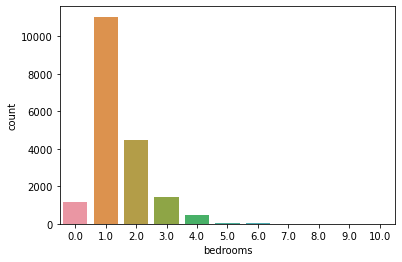

In [20]:
my_data['bathrooms'].hasnans
pd.value_counts(my_data['bathrooms'])
np.unique(my_data['bathrooms'])
sns.countplot(x=my_data['bedrooms'])


<br>
===============================================================================<br>
Since Bathrooms is Empty it is being dropped<br>
==============================================================================<br>


In [21]:
my_data.drop(columns=['bathrooms'],inplace=True)


<br>
===============================================================================<br>
Bathrooms is dropped<br>
==============================================================================<br>



<br>
==============================================================================<br>
 Checking 'Price' for any nans or wrong entries<br>
===============================================================================<br>


In [22]:
my_data['price'].hasnans
pd.value_counts(my_data['price'])
np.unique(my_data['price'])
my_data['price'].max()
my_data['price'].min()

12.0


<br>
==============================================================================<br>
Prices of the houses range from 12 euros to 6000 euros<br>
==============================================================================<br>



<br>
==============================================================================<br>
 Checking 'minstay' for any nans or wrong entries<br>
===============================================================================<br>


In [23]:
my_data['minstay'].hasnans
pd.value_counts(my_data['minstay'])
np.unique(my_data['minstay'])

array([nan, nan, nan, ..., nan, nan, nan])


<br>
==============================================================================<br>
 Since Minstay is empty it is not significant so it is being dropped<br>
===============================================================================<br>


In [24]:
my_data.drop(columns=['minstay'],inplace=True)


<br>
===============================================================================<br>
minstay is dropped<br>
==============================================================================<br>



<br>
==============================================================================<br>
Analyzing bedroom with Price<br>
==============================================================================<br>


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

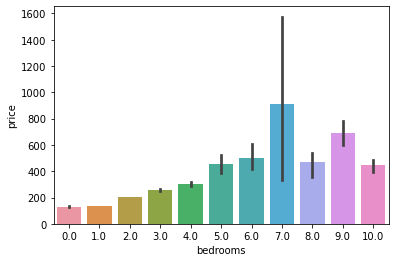

In [25]:
b_p_nd=my_data[['bedrooms','price']]
b_p_cr=b_p_nd.corr()
b_p_nd.corr()
sns.barplot(x=my_data["bedrooms"],y=my_data['price'])


<br>
==============================================================================<br>
There is Positive corelation of 0.44 between bedrooms and price hence it may <br>
affect price positively<br>
==============================================================================<br>



<br>
==============================================================================<br>
Analyzing Reviews with Price<br>
==============================================================================<br>


In [26]:
r_p_nd=my_data[['reviews','price']]
r_p_cr=r_p_nd.corr()
r_p_nd.corr()

,reviews,price
reviews,1.000000,-0.084763
price,-0.084763,1.000000



<br>
==============================================================================<br>
Reviews does not show any significant relationship with price.<br>
==============================================================================<br>



<br>
==============================================================================<br>
Analyzing Overall Satisfaction with Price<br>
==============================================================================<br>


In [27]:
os_p_nd=my_data[['overall_satisfaction','price']]
os_p_cr=os_p_nd.corr()
os_p_nd.corr()

,overall_satisfaction,price
overall_satisfaction,1.000000,-0.045524
price,-0.045524,1.000000



<br>
==============================================================================<br>
Overall Satisfaction does not show any significant relationship with price.<br>
==============================================================================<br>



<br>
==============================================================================<br>
Analyzing Accomodates with Price<br>
==============================================================================<br>


<AxesSubplot:xlabel='accommodates', ylabel='price'>

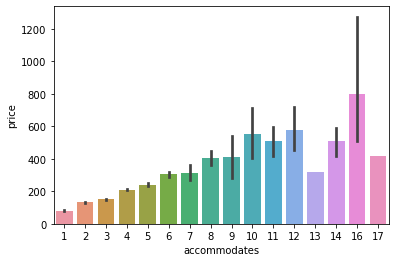

In [28]:
a_p_nd=my_data[['accommodates','price']]
a_p_cr=os_p_nd.corr()
a_p_nd.corr()
sns.barplot(x=my_data['accommodates'],y=my_data['price'])


<br>
==============================================================================<br>
There is Positive corelation of 0.5 between accommodates and price hence it may <br>
affect price positively<br>
==============================================================================<br>



<br>
==============================================================================<br>
Analyzing Neighborhood with Price<br>
==============================================================================<br>


In [32]:
n_hood_data=my_data.groupby("neighborhood")['price'].median()
n_hood_data=n_hood_data.reset_index()
n_hood_count=n_hood_count.reset_index()
n_hood_data['price']=n_hood_data['price'].round(decimals=0)
n_hood_data['price']=n_hood_data['price'].astype(int)
n_hood_count.rename(columns={'index':'neighborhood','neighborhood':"count"},inplace=True)
n_hood_data=n_hood_data.merge(n_hood_count,on="neighborhood")

<AxesSubplot:xlabel='count', ylabel='neighborhood'>

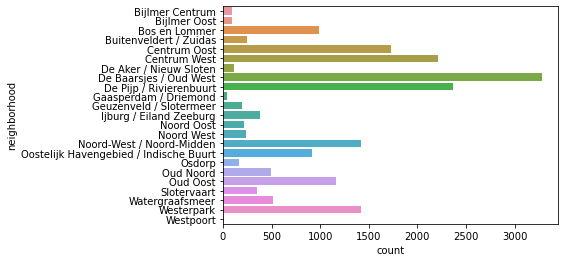

In [34]:
sns.barplot(y=n_hood_data['neighborhood'],x=n_hood_data['count'])

<AxesSubplot:xlabel='price', ylabel='count'>

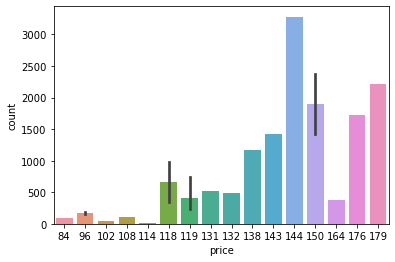

In [35]:
sns.barplot(y=n_hood_data['count'].sort_values(ascending=True),x=n_hood_data['price'])

In [36]:
count_price_cr=n_hood_data.corr()
n_hood_data.corr()

,price,count
price,1.000000,0.702705
count,0.702705,1.000000



<br>
==============================================================================<br>
There is Positive corelation of 0.7 between listings in a neighborhood and <br>
median price in that neighborhood hence it may affect price positively<br>
==============================================================================<br>
